In [1]:
import os
from pathlib import Path

testfolder = 'Simulations/fixedtilt'

if not os.path.exists(testfolder):
    os.makedirs(testfolder)
    
print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in Simulations/fixedtilt


In [2]:
import bifacial_radiance as br
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# This information helps with debugging and getting support :)
import sys, platform
print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("bifacial_radiance version ", br.__version__)
print("pyplot ", plt.matplotlib.__version__)

Working on a  Darwin 21.6.0
Python version  3.11.5 (main, Sep 11 2023, 08:19:27) [Clang 14.0.6 ]
Pandas version  2.0.3
bifacial_radiance version  0.4.2+179.g317ccac.dirty
pyplot  3.7.2


In [4]:
simulationname = 'fixedtilt-groundscan'

# Location:
lat = 39.7555
lon = -105.2211

# Scene Parameters:
azimuth_ang=90
tilt=10

# MakeModule Parameters
moduletype='PVmod'
numpanels=1
module_x = 2 # m
module_y = 1 # m. slope we will measure
sensorsy=2
sensorsground=5

# SceneDict Parameters
pitch = 5.7
albedo = 0.2
azimuth = 150
clearance_height = 0.2
nMods = 20 
nRows = 3

sceneDict = {'tilt':tilt,'pitch':pitch,'clearance_height':clearance_height,'azimuth':azimuth, 'nMods': nMods, 'nRows': nRows} 

In [5]:
demo = br.RadianceObj(simulationname,path = testfolder)
demo.setGround(albedo)
epwfile = demo.getEPW(lat, lon)

path = Simulations/fixedtilt
Loading albedo, 1 value(s), 0.200 avg
1 nonzero albedo values.
Getting weather file: USA_CO_Golden-NREL.724666_TMY3.epw
 ... OK!


In [6]:
module=demo.makeModule(name=moduletype,x=module_x,y=module_y)


Module Name: PVmod
Module PVmod updated in module.json
Pre-existing .rad file objects/PVmod.rad will be overwritten



In [7]:
#Valid options: mm_dd, mm_dd_HH, mm_dd_HHMM, YYYY-mm-dd_HHMM
metdata = demo.readWeatherFile(epwfile, coerce_year=2021, starttime='2021-06-21_12', endtime='2021-06-21_13')

8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Filtering dates
Saving file EPWs/metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos


In [8]:
demo.gendaylit(timeindex=0)  

'skies/sky2_39.74_-105.18_2021-06-21_1200.rad'

In [9]:
scene = demo.makeScene(module,sceneDict)

In [10]:
octfile = demo.makeOct()

Created fixedtilt-groundscan.oct


In [11]:
analysis = br.AnalysisObj(octfile, demo.name)

In [12]:
sensorsgroundvalues = np.array([2, 3, 5, 10, 20, 30, 100, 150, 200, 250, 300, 400, 500])

In [13]:
results = []

for i, sensorsground in enumerate(sensorsgroundvalues):
    wm2 = []
    print(f"sensorsground: {sensorsground}")
    groundscan = analysis.groundAnalysis(scene, sensorsground=sensorsground)
    ground = analysis.analysis(octfile, "groundscan" + str(sensorsground), groundscan)
    print(ground)
    for i, x in enumerate(ground['x']):
        if x >= 1 and x <= pitch-1:
            wm2.append(ground['Wm2'])
    results.append(np.mean(wm2))
    print("")

sensorsground: 2
Linescan in process: groundscan2_Front
Saved: results/irr_groundscan2.csv
{'Wm2': [17.12512, 16.71536], 'x': [0.0, 2.85], 'y': [0.0, -4.936345], 'z': [0.05, 0.05], 'r': [17.12512, 16.71536], 'g': [17.12512, 16.71536], 'b': [17.12512, 16.71536], 'mattype': ['groundplane', 'groundplane'], 'title': 'groundscan2_Front'}

sensorsground: 3
Linescan in process: groundscan3_Front
Saved: results/irr_groundscan3.csv
{'Wm2': [15.975900000000001, 958.5631, 16.6551], 'x': [0.0, 1.425, 2.85], 'y': [0.0, -2.468172, -4.936345], 'z': [0.05, 0.05, 0.05], 'r': [15.9759, 958.5631, 16.6551], 'g': [15.9759, 958.5631, 16.6551], 'b': [15.9759, 958.5631, 16.6551], 'mattype': ['groundplane', 'groundplane', 'groundplane'], 'title': 'groundscan3_Front'}

sensorsground: 5
Linescan in process: groundscan5_Front
Saved: results/irr_groundscan5.csv
{'Wm2': [16.89621, 959.072, 958.9769, 959.054, 16.95116], 'x': [0.0, 0.7125, 1.425, 2.1375, 2.85], 'y': [0.0, -1.234086, -2.468172, -3.702259, -4.936345], 

Saved: results/irr_groundscan150.csv
{'Wm2': [16.87264, 16.83549, 16.79833, 17.403, 18.21093, 19.01886, 23.024060000000002, 24.14967, 25.275269999999995, 39.88113, 41.80638, 43.73163, 896.0814, 900.6426, 905.2039, 933.7113, 940.1168000000001, 946.5222, 947.1432, 949.2584, 951.3737, 952.8299000000001, 953.4038, 953.9777, 954.5515, 955.1254, 957.0009999999999, 956.9535, 956.9059000000001, 956.8583, 956.8107, 956.7631, 956.7154999999999, 956.668, 958.9662, 959.0103, 959.0543000000001, 959.0983, 959.1423, 959.1863, 959.2303, 959.2743, 959.3182, 959.3622, 959.4062, 959.3757, 959.3737, 959.3714999999999, 959.3694, 959.3673, 959.3651999999998, 959.3631, 959.361, 959.3588999999998, 959.3568, 959.3546, 959.3525, 959.3503999999999, 959.3483, 959.3462, 959.3440999999999, 959.342, 959.3398000000001, 959.3377, 959.3356, 958.9191999999999, 958.9357, 958.9522000000001, 958.9688, 958.9852999999999, 959.0018, 959.0183000000001, 959.0349, 959.0514, 959.0679, 959.0845, 959.101, 959.1175, 959.134, 959.150

Saved: results/irr_groundscan200.csv
{'Wm2': [16.47931, 16.55539, 16.63148, 17.23468, 17.71897, 18.20327, 19.44318, 20.1449, 20.84661, 25.29136, 26.213399999999996, 27.13544, 40.07312, 41.54183, 43.010529999999996, 878.665, 881.4419000000001, 884.2188, 918.5776, 922.6132000000001, 926.6487000000001, 937.4449, 941.2536999999999, 945.0624000000001, 948.8712, 948.8484, 949.8872, 950.926, 951.9648000000001, 953.0035000000001, 954.3889, 954.6475999999999, 954.9062, 955.1648, 955.4235, 955.6821, 955.9407, 956.1992999999999, 956.458, 957.9883, 957.9904, 957.9925, 957.9945000000001, 957.9966, 957.9987, 958.0007, 958.0027, 958.0048, 958.0068, 958.0089000000002, 958.0108999999999, 958.013, 958.015, 958.0171, 958.0192000000001, 958.0212, 958.0233, 958.0252999999999, 958.0273000000001, 959.755, 959.7714, 959.7878, 959.8042, 959.8206, 959.837, 959.8534, 959.8698, 959.8862, 959.9026, 959.9189, 959.9353, 959.9517, 959.9681, 959.9845, 960.0009, 960.0173, 960.0337, 959.1399, 959.1326, 959.1252, 959.117

Saved: results/irr_groundscan250.csv
{'Wm2': [16.67998, 16.69377, 16.70755, 16.72134, 17.31099, 17.68299, 18.05498, 18.42698, 20.17379, 20.75808, 21.34237, 21.92666, 27.224229999999995, 28.0205, 28.81677, 29.61304, 45.70861, 47.04767999999999, 48.38675, 852.6043, 895.5195, 898.2208999999999, 900.9224, 903.6238, 927.9468, 931.5201000000001, 935.0933, 938.6666, 942.6909, 944.6412, 946.5915, 948.5418, 950.4921, 950.631, 951.2642, 951.8975, 952.5306999999999, 953.1639, 953.7971000000001, 954.3807, 954.5422, 954.7036000000002, 954.8651, 955.0266, 955.188, 955.3494999999999, 955.511, 955.6724, 957.9087, 957.9109, 957.9132, 957.9155, 957.9178, 957.9200999999999, 957.9224, 957.9247, 957.927, 957.9293000000001, 957.9316, 957.9338000000001, 957.9362, 957.9384999999999, 957.9407, 957.9429999999999, 957.9453, 957.9476, 957.9499, 957.9521, 959.3037, 959.3159, 959.3282, 959.3404, 959.3527, 959.3649, 959.3771, 959.3893000000002, 959.4016, 959.4137999999999, 959.4261, 959.4383000000001, 959.4506, 959.

Saved: results/irr_groundscan300.csv
{'Wm2': [16.61044, 16.63063, 16.65082, 16.67101, 16.6912, 17.66963, 18.05555, 18.44146, 18.82738, 19.21329, 20.46879, 20.96634, 21.4639, 21.96145, 22.459009999999996, 28.460529999999995, 29.15272, 29.84492, 30.53711, 31.2293, 51.57942, 52.83686, 54.09431, 858.2302, 859.4877, 904.1095, 906.5795000000002, 909.0495, 911.5195, 913.9894, 932.4384, 935.5956, 938.7529, 941.9101999999999, 945.0675, 945.0252, 946.3969000000001, 947.7684, 949.1401, 950.5117, 951.8833, 951.8989, 952.2842, 952.6694000000001, 953.0547, 953.4399, 953.8251999999999, 954.2104, 954.5957, 956.0512, 956.082, 956.1129, 956.1437, 956.1745, 956.2053, 956.2361, 956.2670000000002, 956.2977, 956.3286000000002, 956.3593999999999, 956.3902000000002, 956.4209999999999, 956.4518000000002, 956.4827, 956.5135, 958.7098, 958.7271999999999, 958.7446, 958.7620000000001, 958.7794, 958.7968, 958.8142000000001, 958.8314999999999, 958.8489, 958.8663, 958.8837, 958.9011, 958.9185000000001, 958.9359, 958.

Saved: results/irr_groundscan400.csv
{'Wm2': [16.58257, 16.60901, 16.63545, 16.66189, 16.68833, 16.71477, 17.55744, 17.82538, 18.09332, 18.36126, 18.62919, 18.89713, 19.16768, 19.51755, 19.86742, 20.21729, 20.56716, 20.91702, 24.9543, 25.40912, 25.86395, 26.31877, 26.7736, 27.22842, 38.76691, 39.47565, 40.18438, 40.89312, 41.60185, 42.31058, 878.5699, 879.9536000000002, 881.3373, 882.7211000000001, 884.1048, 885.4886, 918.5444000000001, 920.6432, 922.7422, 924.8411, 926.9401000000001, 929.0389, 937.721, 939.6502, 941.5793, 943.5085, 945.4375999999999, 947.3668000000001, 949.2959999999999, 948.1068, 948.7192, 949.3314999999999, 949.944, 950.5562999999999, 951.1686999999998, 951.7811, 952.3934, 953.0059, 953.8826, 954.0523, 954.2220000000001, 954.3916, 954.5613, 954.7310000000001, 954.9006, 955.0703, 955.2399, 955.4095000000001, 955.5792, 955.7489, 955.9186, 956.4182, 956.4359, 956.4535, 956.4712, 956.4889, 956.5066, 956.5243, 956.542, 956.5597000000001, 956.5774, 956.5951, 956.6127, 956

Saved: results/irr_groundscan500.csv
{'Wm2': [16.91962, 16.94046, 16.9613, 16.98214, 17.00298, 17.02382, 17.04466, 16.92515, 17.09945, 17.27376, 17.44806, 17.62236, 17.79667, 17.97097, 18.73837, 19.0112, 19.28404, 19.55688, 19.82971, 20.10254, 20.37538, 23.44579, 23.77656, 24.10733, 24.438100000000002, 24.76888, 25.09965, 25.43042, 34.50389, 35.00123, 35.49857, 35.99591, 36.49325, 36.99059, 37.48793, 59.30115, 60.168, 61.03484, 864.7802, 865.647, 866.5139, 867.3807, 905.6559000000001, 907.1524, 908.6488, 910.1453, 911.6417, 913.1382, 914.6346, 930.2262999999999, 932.0867, 933.947, 935.8075, 937.6678, 939.5283, 941.3887, 942.2427000000001, 943.1815, 944.1204000000001, 945.0592, 945.998, 946.9369, 947.8757, 948.8146, 949.7535000000001, 950.1559000000001, 950.5139, 950.8718, 951.2297, 951.5877, 951.9456999999999, 952.3035999999998, 952.6616, 953.0196, 953.3776000000001, 953.7355000000001, 954.0934000000001, 954.882, 954.9444, 955.0068, 955.0692, 955.1317, 955.1941, 955.2565, 955.319, 955.

In [14]:
results

[16.92024,
 330.39803333333333,
 582.190054,
 761.8462600000001,
 725.2447245,
 740.262754,
 777.7821951,
 775.3989701999999,
 782.39958325,
 783.2942965599999,
 781.1986749,
 782.6361228750002,
 781.96494274]

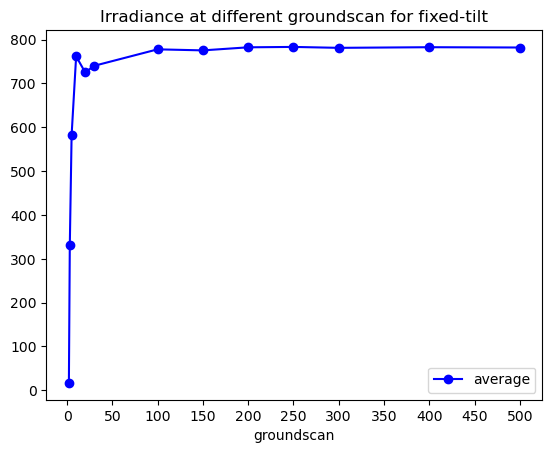

In [15]:
df = pd.DataFrame({
    'groundscan': sensorsgroundvalues,
    'average': results
})

df.plot(x='groundscan', y='average', marker='o', color='blue')
plt.xticks(np.arange(0, 501, 50))
plt.title('Irradiance at different groundscan for fixed-tilt')
plt.show()